In [2]:
!pip install ucimlrepo
!pip install scikit-learn

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo

In [26]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

In [27]:
# Convertir la calidad en variable categórica para clasificación
y_classification = y.copy()
y_classification["quality"] = y_classification["quality"].apply(lambda q: 1 if q >= 6 else 0)  # Binaria: 1 (bueno) o 0 (malo)

In [28]:
# Dividir los datos en entrenamiento y prueba
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

In [29]:
# Escalar los datos
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [30]:
# Escalar los datos
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [37]:
# Asegurarse de que y_train_clf y y_test_clf estén en forma de vector unidimensional
y_train_clf = y_train_clf.to_numpy().ravel()
y_test_clf = y_test_clf.to_numpy().ravel()


In [83]:
# Crear el modelo SVM de clasificación
model = SVC(C=0.6, kernel='rbf', gamma='auto', probability=True)
# Entrenar el modelo
model.fit(X_train_clf, y_train_clf)
# Realizar las predicciones
y_pred_clf = model.predict(X_test_clf)

In [84]:
# Cálculo de métricas de clasificación
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

In [85]:
# Impresión de resultados
print(f"Clasificación - Accuracy: {accuracy}")
print(f"Clasificación - Precision: {precision}")
print(f"Clasificación - Recall: {recall}")
print(f"Clasificación - F1-Score: {f1}")
print(f"Clasificación - Matriz de Confusión: \n{conf_matrix}")

Clasificación - Accuracy: 0.7646153846153846
Clasificación - Precision: 0.8146002317497103
Clasificación - Recall: 0.8280329799764429
Clasificación - F1-Score: 0.8212616822429907
Clasificación - Matriz de Confusión: 
[[291 160]
 [146 703]]


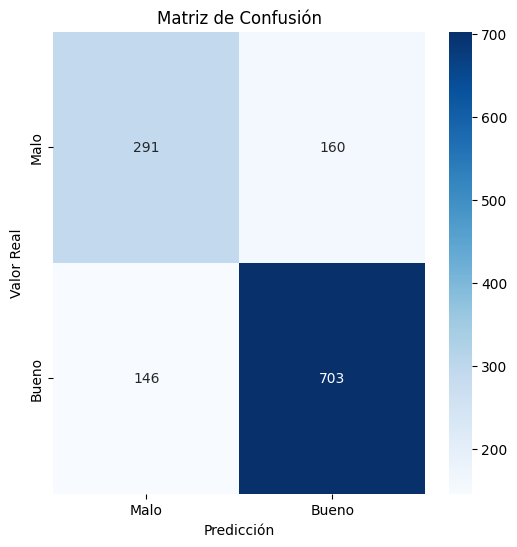

In [86]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malo", "Bueno"], yticklabels=["Malo", "Bueno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()